## IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from itertools import combinations

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
pd.options.display.float_format = '{:.2f}'.format

## IMPORT THE DATASET

In [2]:
data = pd.read_csv('avocado.csv')
data = data.drop('Unnamed: 0',axis = 1)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


## VISUALIZE THE DATASET

- ### AVOCADO TYPES

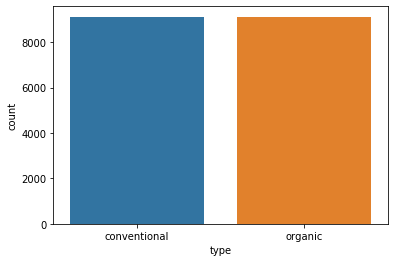

In [3]:
sns.countplot('type',data = data)

- ### PERCENTAGE OF EACH TYPE OF AVOCADO

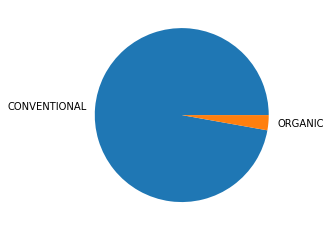

In [4]:
df = data.groupby(data['type']).sum()
plt.pie(df['Total Volume'],data = df,labels = ['CONVENTIONAL','ORGANIC'])
plt.show()

- ### TOTAL VOLUME vs YEAR

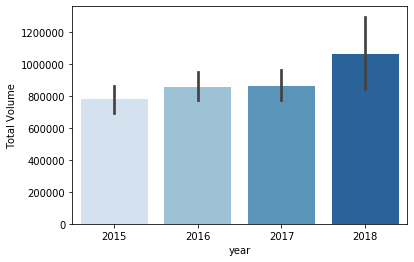

In [5]:
sns.barplot(x = 'year',y = 'Total Volume',data = data,palette= 'Blues')

- ### HEATMAP FOR FINDING CORRELATIONS BETWEEN AVERAGEPRICE & OTHER FEATURES

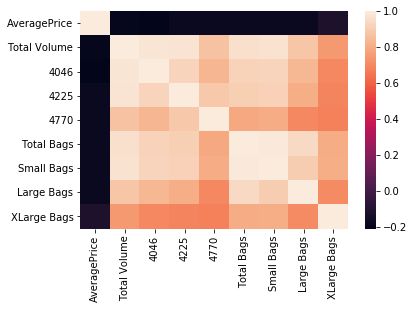

In [6]:
df = data.drop(columns = ['year','region'])
sns.heatmap(df.corr())

- ### AVERAGEPRICE ACCORDING TO CITIES ALONG THE YEARS

E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\ANACONDA\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


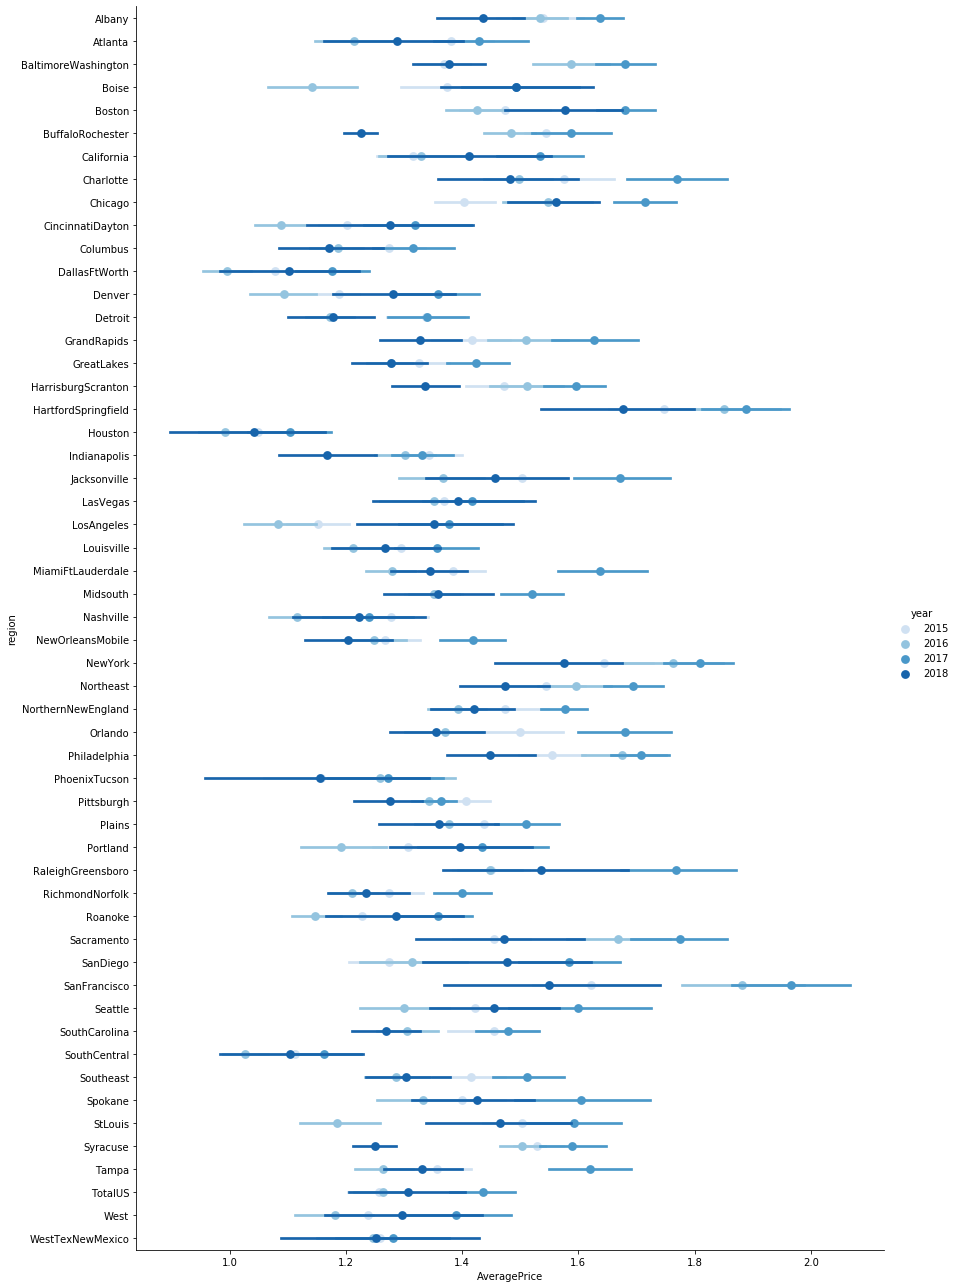

In [7]:
sns.factorplot('AveragePrice','region',data=data,hue='year',size=18,aspect=0.7,palette='Blues',join=False)

- ### AVERAGEPRICE VARIATION ALONG THE YEARS 

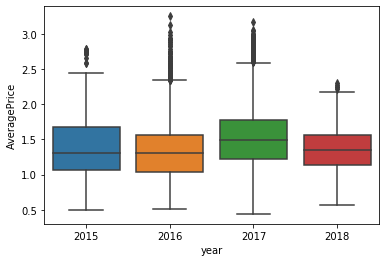

In [8]:
sns.boxplot('year','AveragePrice',data = data)

- ### DISTRIBUTION OF AVERAGEPRICE

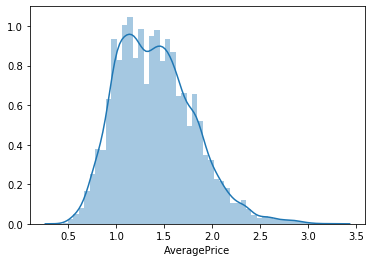

In [9]:
sns.distplot(data['AveragePrice'])

- ### PLOTS WITH RESPECT TO TIME

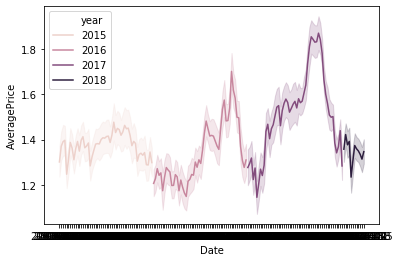

In [10]:
sns.lineplot('Date','AveragePrice',hue = 'year',data = data,)

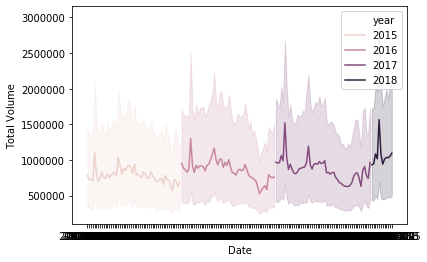

In [11]:
sns.lineplot('Date','Total Volume',hue = 'year',data = data)

- ### SOME MORE VISUALIZATIONS

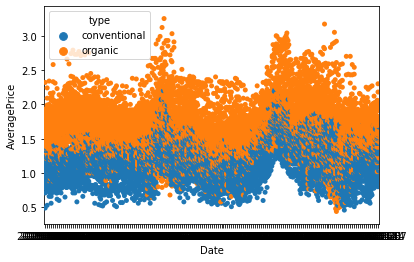

In [12]:
sns.swarmplot('Date','AveragePrice',data = data,hue = 'type')

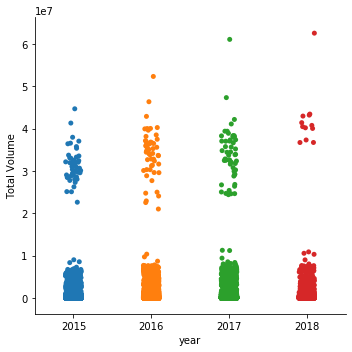

In [13]:
sns.catplot('year','Total Volume',data = data)

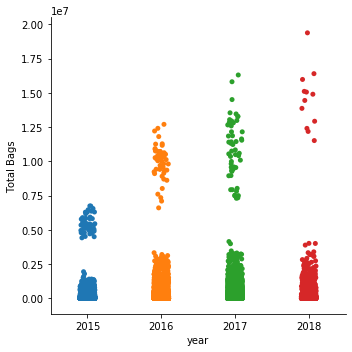

In [14]:
sns.catplot('year','Total Bags',data = data)

- # TIMESERIES ANALYSIS

### FUNCTIONS FOR ANALYSIS

In [15]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [16]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

## PREPROCESSING

- ### DROPPING THE UNNECESSARY COLUMNS
- ### CONVERTING DATES TO DATETIME AND SETTING IT AS INDEX
- ### RESAMPLE [GROUPBY] THE DATA ACCORDING TO YOUR DATASET

In [17]:
data = data.drop(columns = ['Total Volume','Total Bags','year','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'])
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.resample('W').sum()
data.head()

,AveragePrice
Date,
2015-01-04,140.54
2015-01-11,148.03
2015-01-18,150.24
2015-01-25,150.89
2015-02-01,134.68


- ## TIMESERIES ANALYSIS

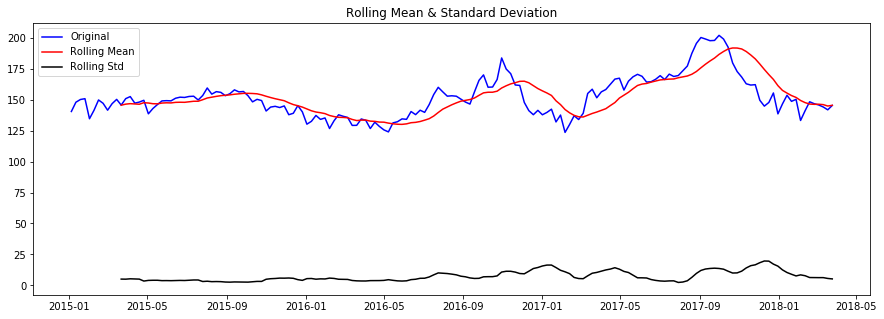

Results of Dickey-Fuller Test:
Test Statistic                 -2.36
p-value                         0.15
#Lags Used                      0.00
Number of Observations Used   168.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [18]:
test_stationarity(data['AveragePrice'])

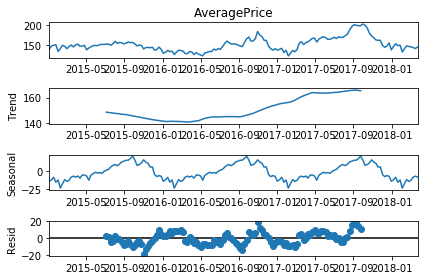

In [19]:
dec = sm.tsa.seasonal_decompose(data['AveragePrice'],period = 52).plot()
plt.show()

- ## DATA HAS TREND & SEASONALITY 
- ## DATA HAS AN INCREASING TREND
- ## DATA HAS A YEARLY SEASONAL PATTERN 
- ## DATA IS NOT STATIONARY 

# DIFFERENCING

- ## 1st DIFFERENCING TO ELIMINATE THE TREND 

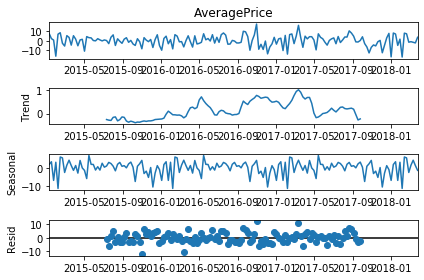

In [20]:
data_diff = data['AveragePrice'].diff()
data_diff = data_diff.dropna()
dec = sm.tsa.seasonal_decompose(data_diff,period = 52).plot()
plt.show()

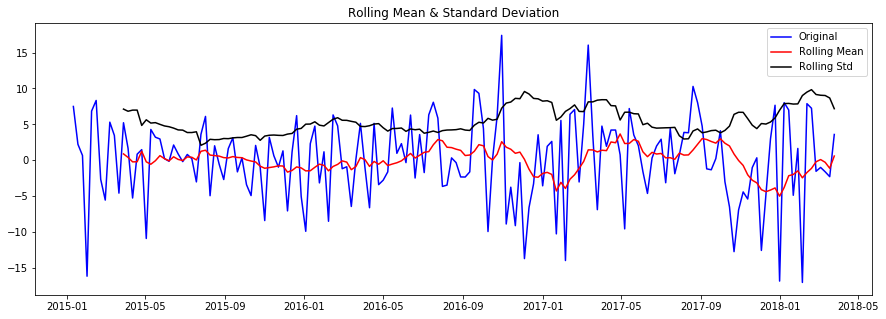

Results of Dickey-Fuller Test:
Test Statistic                -13.20
p-value                         0.00
#Lags Used                      0.00
Number of Observations Used   167.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [21]:
test_stationarity(data_diff)

- ### TREND HAS NOW BEEN ELIMINATED BUT SEASONALITY IS PRESENT BUT NOT CLEARLY VISIBLE
- ### DICKEY-FULLER TEST TELLS US THAT OUR DATA IS STATIONARY
- ### DETERMINATION IF DATA  IS STATIONARY:

- 1] P-VALUE < 0.05
- 2] TEST STATISTIC < CRITICAL VALUE
- 3] THE MOVING AVERAGE OF THE DATA IS ALSO NEARLY 0 AND ROTATES AROUND 0

# ARIMA 

-  THE PREDICTIONS OF ARIMA MODEL ARE NOT GOING TO BE GOOD BECAUSE OUR DATA IS SEASONAL
-  WE HAVE NOT CONSIDERED THE SEASONAL PATTERN IN THIS PATTERN
-  p = PARTIAL AUTOCORRELATION = 0 -> PLOT SHOWS NO INSIGNIFICANT LAGS
-  d = DIFFERENCING = 0 -> DIFFERENCING DONE 1 TIME
-  q = AUTOCORRELATION = 0 -> PLOT SHOWS NO INSIGNIFICANT LAGS

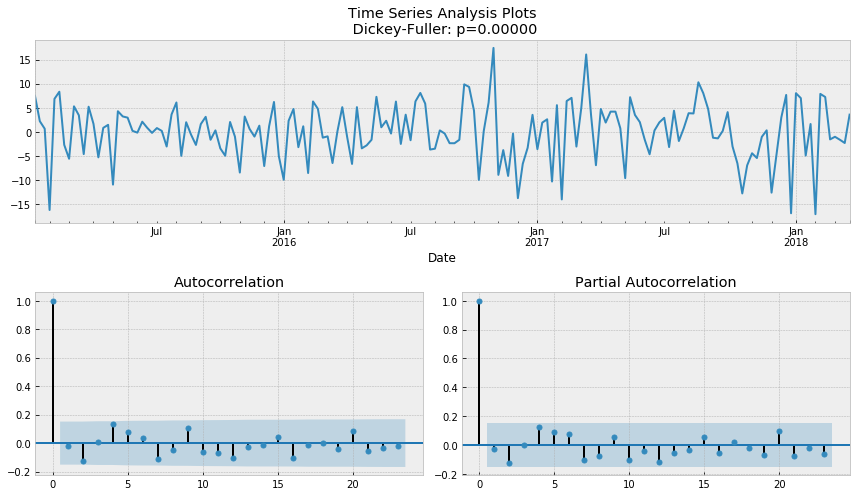

In [22]:
tsplot(data_diff)

In [23]:
model = ARIMA(data['AveragePrice'],order = (0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.AveragePrice   No. Observations:                  168
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -534.206
Method:                           css   S.D. of innovations              5.817
Date:                Fri, 05 Jun 2020   AIC                           1072.413
Time:                        16:52:31   BIC                           1078.661
Sample:                    01-11-2015   HQIC                          1074.948
                         - 03-25-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.449      0.065      0.948      -0.850       0.909


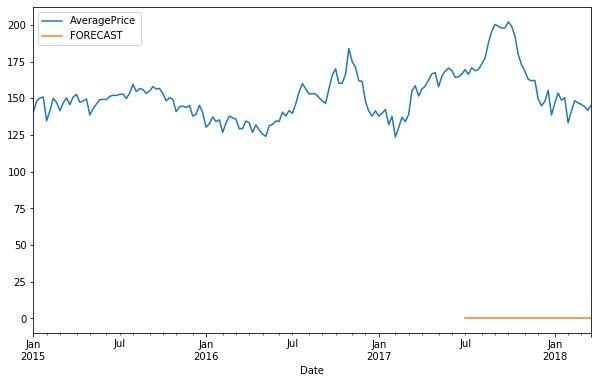

In [24]:
data['FORECAST'] = model_fit.predict(start = 130,end = 170,dynamic = True)
data[['AveragePrice','FORECAST']].plot(figsize = (10,6))

In [25]:
exp = [data.iloc[i,0] for i in range(130,len(data))]
pred = [data.iloc[i,1] for i in range(130,len(data))]
data = data.drop(columns = 'FORECAST')
error = mean_absolute_error(exp,pred)
error

165.58532967032968

- THE MODEL OUPUTS POOR PREDICTIONS
- MEAN ABSOLUTE ERROR VALUE ALSO HAS A HIGH VALUE
- THEREFORE,WE REJECT THIS MODEL AND MOVE TOWARDS SEASONAL ARIMA [SARIMA]

# SARIMAX

- HERE WE ARE WORKING ON WEEKLY DATA AND OUR SEASONAL PERIOD IS OF 1 YEAR 
- FOR OUR DATA, S = 52 WEEKS , 52 ENTRIES OF OUR DATAFRAME
- HENCE WE DIFFERENCE BY 52

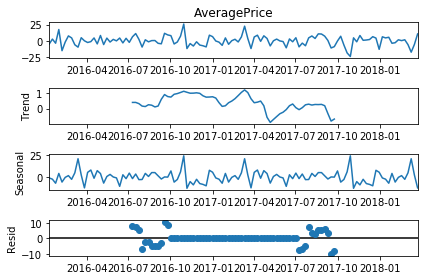

In [26]:
data_diff_seas = data_diff.diff(52)
data_diff_seas = data_diff_seas.dropna()
dec = sm.tsa.seasonal_decompose(data_diff_seas,period = 52).plot()
plt.show()

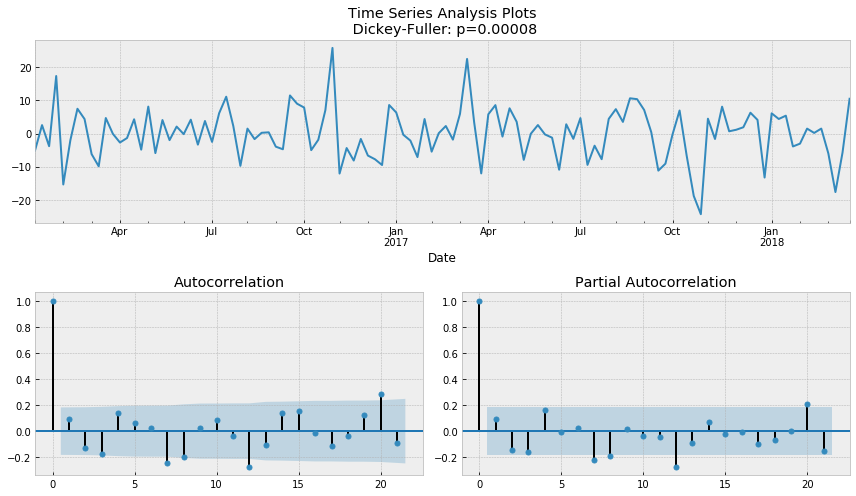

In [27]:
tsplot(data_diff_seas)

## SEASONAL ORDER

## SIMILAR TO ARIMA ORDER
-  P ->(0-2) 
-  D ->1
-  Q ->(0-2)
- SELECT ORDER HAVING THE LEAST AIC MODEL VALUE

In [28]:
model = sm.tsa.statespace.SARIMAX(data['AveragePrice'],order = (0,1,0),seasonal_order = (1,1,0,52))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       AveragePrice   No. Observations:                  169
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 52)   Log Likelihood                -388.610
Date:                            Fri, 05 Jun 2020   AIC                            781.220
Time:                                    16:53:33   BIC                            786.727
Sample:                                01-04-2015   HQIC                           783.455
                                     - 03-25-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52      -0.5634      0.067     -8.426      0.000      -0.694      -0.432
sigma2        40.0901      5.080   

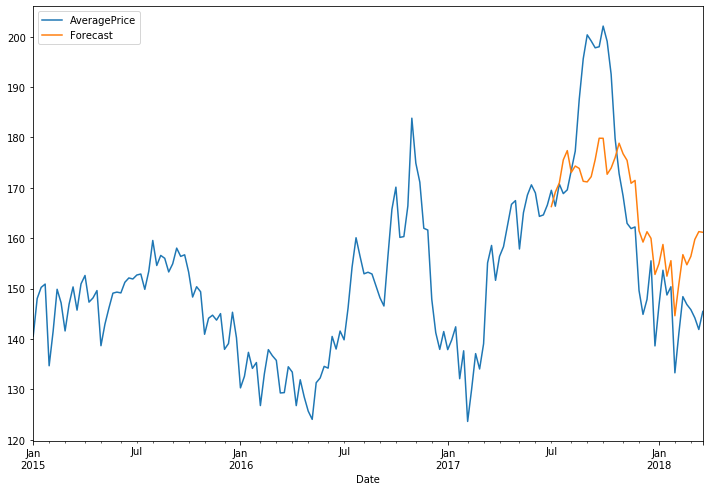

In [29]:
data['Forecast'] = results.predict(start = 130,end = 169,dynamic = True)
data[['AveragePrice','Forecast']].plot(figsize = (12,8))

In [30]:
exp = [data.iloc[i,0] for i in range(130,len(data))]
pred = [data.iloc[i,1] for i in range(130,len(data))]

error = mean_absolute_error(exp,pred)
error

11.641996866455685

- ### MEAN ABSOLUTE ERROR OF OUR MODEL IS 11.64
- ### IT IS OK AND CAN BE INCREASED BY DIFFERENING OR USING THE SAME TECHNIQUES 
- ### WITH DIFFERENT TRANSFORMATIONS FOR FORECASTING PURPOSE

- ## FORECASTING

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates = [data.index[-1] + DateOffset(weeks = x)for x in range(0,52)]

In [32]:
df = pd.DataFrame(index = future_dates[1:],columns = data.columns)

E:\ANACONDA\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


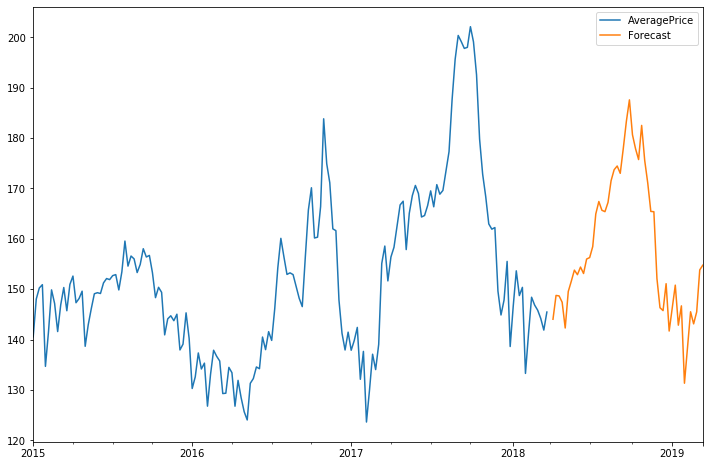

In [33]:
forecast = pd.concat([data,df])
forecast['Forecast'] = results.predict(start = 170,end = 222,dynamic = True)
forecast[['AveragePrice','Forecast']].plot(figsize = (12,8))

# THANK YOU

- # REFERENCES
- ### AI ADVENTURES,PUNE
- ### MACHINELEARNING MASTERY
- ### KRISH NAIK [YOUTUBE]
- ### DUKE EDU